<a href="https://colab.research.google.com/github/ArunitaYen/MachineLearningPipes/blob/main/Copy_of_structure_in_data_ad_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Last amended: 13th May 2022
# Data source: Kaggle: https://www.kaggle.com/fayomi/advertising
#
# Spyder note: Use F9 in Spyder to execute a line and advance
#
# objectives:
#           Discover relationships and existence of pattern
#           in data
#              i)  Feature Engineering for categorical variables
#             ii)  Extracting datetime components
#             iii) Behaviour of 'apply' vs 'map' for Series
#              iv)  Learning to draw various types of graphs
#               v)  Conditional plots using catplot
#              vi)  Relationship plots using relplot
#             vii)  Learning seaborn plots
#            viii)  Looking at structure in data
#                       a. Parallel coordinates plots
#                       b. Radviz plots
#                       c. Andrews curves

# Good reference: https://seaborn.pydata.org/introduction.html


## Call libraries

In [7]:

# 1.0 Call libraries
%reset -f
# 1.1 For data manipulations
import numpy as np
import pandas as pd
from numpy.random import default_rng #(creating random data)

# 1.2 For plotting
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl     # For creating colormaps

# 1.3 For data processing
from sklearn.preprocessing import StandardScaler

# 1.4 OS related
import os

# 1.5 for working in ipython
#%matplotlib qt5
#%matplotlib inline


In [8]:
#1.6 From a cell display outputs from multiple commands:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [9]:
# 1.6.1 For generating random numbers:
rng = default_rng()

In [10]:
# 1.7 Mount google drive:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [14]:
# 1.8 Go to folder containing data file
path = "/gdrive/MyDrive/Colab Notebooks/ad_processed.csv"


In [ ]:
# 1.8.1 Change working directory
os.chdir(path)

# 1.8.2 list files
os.listdir()            # List all files in the folder


['advertising (1).zip',
 'advertising_data_visualization seaborn.py',
 'advertising.zip',
 'ad_processed.csv',
 'ad_processed.pkl']

## Read data

In [16]:
# 2.0 Read already processed ad-data file 
#     This data was processed in github file
#      'advertising_data_visualization.ipynb'

ad = pd.read_csv(path)

In [17]:
# 2.1 Have a look at the data
ad.head()
print("\n-----\n")
ad.dtypes
print("\n------\n")
ad.dtypes.value_counts()

,DailyTimeSpentonSite,Age,AreaIncome,DailyInternetUsage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked_on_ad,age_cat,area_income_cat,AdTopicLineLength,AdTopicNoOfWords,hour,hourOfDay,weekday,quarter
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,m,h,34,3,1,0,6,1
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,y,h,34,3,1,1,0,2
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,y,h,32,3,4,20,6,1
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,y,m,37,3,1,2,6,1
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,m,h,29,3,1,3,4,2



-----



DailyTimeSpentonSite    float64
Age                       int64
AreaIncome              float64
DailyInternetUsage      float64
Ad Topic Line            object
City                     object
Gender                    int64
Country                  object
Timestamp                object
Clicked_on_ad             int64
age_cat                  object
area_income_cat          object
AdTopicLineLength         int64
AdTopicNoOfWords          int64
hour                      int64
hourOfDay                 int64
weekday                   int64
quarter                   int64
dtype: object


------



int64      9
object     6
float64    3
dtype: int64

## Some pre-processing

In [18]:
# 3.0 Select only numeric columns for the purpose
num_data = ad.select_dtypes(include = ['float64', 'int64']).copy()
num_data.head()
num_data.shape       # (1000, 11)
num_data.columns


,DailyTimeSpentonSite,Age,AreaIncome,DailyInternetUsage,Gender,Clicked_on_ad,AdTopicLineLength,AdTopicNoOfWords,hour,hourOfDay,weekday,quarter
0,68.95,35,61833.90,256.09,0,0,34,3,1,0,6,1
1,80.23,31,68441.85,193.77,1,0,34,3,1,1,0,2
2,69.47,26,59785.94,236.50,0,0,32,3,4,20,6,1
3,74.15,29,54806.18,245.89,1,0,37,3,1,2,6,1
4,68.37,35,73889.99,225.58,0,0,29,3,1,3,4,2


(1000, 12)

Index(['DailyTimeSpentonSite', 'Age', 'AreaIncome', 'DailyInternetUsage',
       'Gender', 'Clicked_on_ad', 'AdTopicLineLength', 'AdTopicNoOfWords',
       'hour', 'hourOfDay', 'weekday', 'quarter'],
      dtype='object')

In [19]:
# 3.1 Columns in num_data that are either discrete (with few levels)
#     or numeric

cols=['DailyTimeSpentonSite', 'Age','AreaIncome',
      'DailyInternetUsage','Gender', 'AdTopicLineLength',
      'AdTopicNoOfWords', 'hourOfDay', 'quarter', 'weekday','Clicked_on_ad' ]

In [20]:
# 3.2 Create an instance of StandardScaler object
ss= StandardScaler()

In [21]:
# 3.3 Use fit and transform method
nc = ss.fit_transform(num_data.loc[:,cols])


In [22]:
# 3.4
nc.shape     # (1000,9)


(1000, 11)

In [23]:
# 3.5 Transform numpy array back to pandas dataframe
#        as we will be using pandas plotting functions

nc = pd.DataFrame(nc, columns = cols)
nc.head(2)

,DailyTimeSpentonSite,Age,AreaIncome,DailyInternetUsage,Gender,AdTopicLineLength,AdTopicNoOfWords,hourOfDay,quarter,weekday,Clicked_on_ad
0,0.249267,-0.114905,0.509691,1.734030,-0.962695,0.105592,-0.451725,-1.675896,-0.969614,1.469856,-1.0
1,0.961132,-0.570425,1.002530,0.313805,1.038750,0.105592,-0.451725,-1.532166,0.550157,-1.533937,-1.0


In [24]:
# 3.6 Add/overwrite few columns that are discrete
#        These columns were not to be scaled

nc['Gender'] = ad['Gender']
nc['quarter'] = ad['quarter']
nc['hourOfDay'] = ad['hourOfDay']
nc['weekday'] = ad['weekday']
nc['Clicked_on_ad'] = ad['Clicked_on_ad']
nc.shape    # (1000,11)

(1000, 11)

In [25]:
# 4.0 Also create a dataframe from random data
#      for comparison:

rng = np.random.default_rng()
nc_rand = pd.DataFrame(rng.normal(size = (1000,11)),
                       columns = cols    # Assign column names, just like that
                       )


In [26]:
# 4.1 Add/overwrite these columns also
#
nc_rand['Clicked_on_ad'] = np.random.randint(2,   size= (1000,))   # [0,1]
nc_rand['Gender']        = np.random.randint(2,   size= (1000,))   # [0,1]
nc_rand['quarter']       = np.random.randint(1,4, size= (1000,))   # [1,2,3]
nc_rand['hourOfDay']     = np.random.randint(24,  size= (1000,))   # [0 to 23]
nc_rand['weekday']       = np.random.randint(7,   size= (1000,))   # [0 to 6]

nc_rand.shape    # (1000,11)


(1000, 11)

## Parallel coordinates plot

In [ ]:
# 5.0   Now start plotting
#        https://pandas.pydata.org/docs/reference/api/pandas.plotting.parallel_coordinates.html



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

Text(0.5, 1.0, 'Parallel chart with random data')

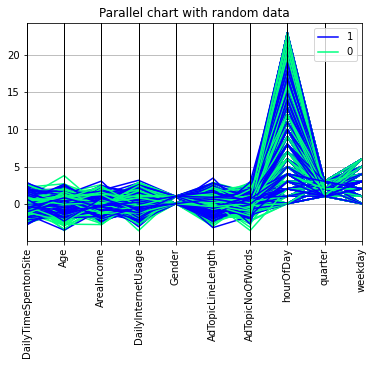

In [27]:
# 5.1 Parallel coordinates with random data

fig1 = plt.figure()
pd.plotting.parallel_coordinates(nc_rand,
                                 'Clicked_on_ad',    # class_column
                                  colormap='winter'
                                  )
plt.xticks(rotation=90)
plt.title("Parallel chart with random data")


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

Text(0.5, 1.0, 'Parallel chart with ad data')

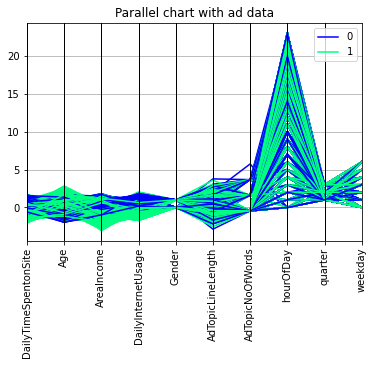

In [28]:
# 5.2 Parallel coordinates with 'ad' data
fig2 = plt.figure()
ax = pd.plotting.parallel_coordinates(nc,
                                 'Clicked_on_ad',
                                  colormap= plt.cm.winter
                                  )

plt.xticks(rotation=90)
plt.title("Parallel chart with ad data")



## Andrews plot

Text(0.5, 1.0, 'Andrews plots with random data')

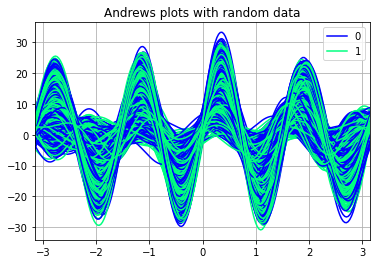

In [ ]:
# 6.0 Andrews charts with random data
fig3 = plt.figure()
pd.plotting.andrews_curves(nc_rand,
                           'Clicked_on_ad',
                           colormap = 'winter')

plt.title("Andrews plots with random data")



(array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.]),
 <a list of 9 Text major ticklabel objects>)

Text(0.5, 1.0, 'Andrews curve with ad data')

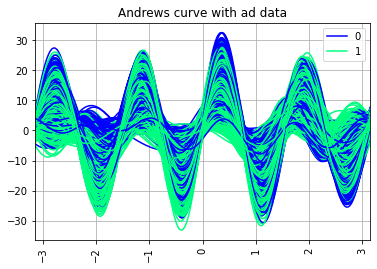

In [ ]:
# 6.1 Andrews plots with ad data
fig4 = plt.figure()
pd.plotting.andrews_curves(nc,
                           'Clicked_on_ad',
                            colormap = plt.cm.winter
                           )
plt.xticks(rotation=90)
plt.title("Andrews curve with ad data")


## Radviz plot

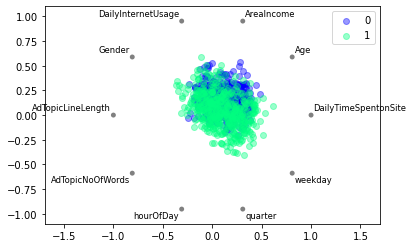

In [ ]:
# 7.0 Radviz plot
# https://pandas.pydata.org/docs/reference/api/pandas.plotting.radviz.html

fig5 = plt.figure()
pd.plotting.radviz(nc,
                   class_column ='Clicked_on_ad',
                   colormap= plt.cm.winter,
                   alpha = 0.4
                   )



## t-sne

In [ ]:
# 8.0 See the power of t-sne
#      (t-distributed Stochastic Neighbor Embedding)

from sklearn.manifold import TSNE


In [ ]:
# 8.1 Project all data but 'Clicked_on_ad' on two axis
#        Also just replace nc with nc_rand and try again

X_embedded = TSNE(n_components=2).fit_transform(nc.iloc[:,:-1])
X_embedded.shape    # (1000,2), numpy array
df = pd.DataFrame(X_embedded, columns=['X','Y'])

# 11.5.2 No two plots will be the same
sns.relplot(x = "X",
            y = "Y",
            hue = nc.Clicked_on_ad,    # Colur each point as per 1 or 0
            data = df
            )




In [ ]:
############## I am done ###############3